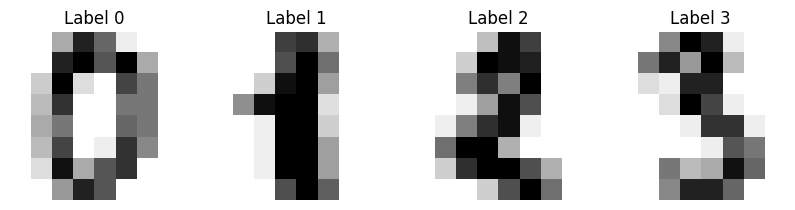

In [18]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label {label}")



In [19]:
len(digits.images)

1797

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
log = LogisticRegression(max_iter=10000)

#X_train, X_train.shape

knn.fit(X_train, y_train)
log.fit(X_train, y_train)

y_knn = knn.predict(X_test)
y_log = log.predict(X_test)

print(classification_report(y_test, y_knn))
print(classification_report(y_test, y_log))

# Så länge vi har få klasser så är KNN bäst! KNN funkar ej vid högre dimensioner. Curse of dimensionality. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.99      1.00      0.99        89
           2       0.99      1.00      0.99        83
           3       0.99      0.96      0.97        93
           4       0.99      1.00      0.99        93
           5       0.99      0.98      0.98        99
           6       1.00      1.00      1.00        98
           7       0.97      1.00      0.98        87
           8       0.98      0.98      0.98        83
           9       0.98      0.96      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.95      0.93      0.94        89
           2       0.94      1.00      0.97        83
           3       0.99 

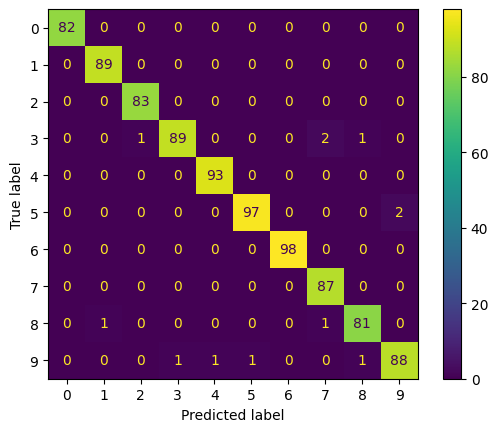

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cn = confusion_matrix(y_test, y_knn)
ConfusionMatrixDisplay(cn).plot()

[Text(0.5, 1.0, 'Elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

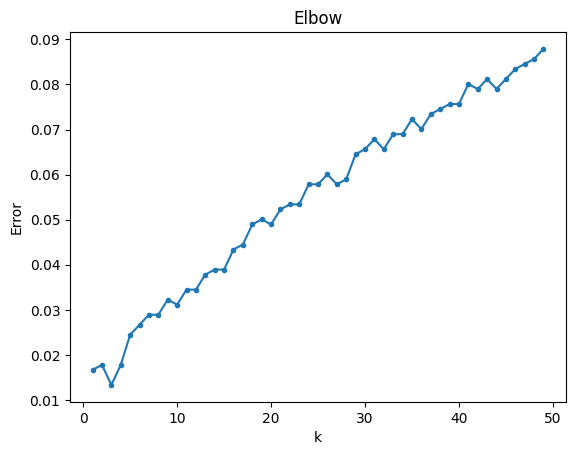

In [22]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(y_test, y_knn)
error_list = list()

for k in range(1,50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train,y_train)
    y_hat = model_KNN.predict(X_test)
    error_list += [1-accuracy_score(y_test, y_hat)]

fig, ax = plt.figure, plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbow", xlabel="k", ylabel="Error")